### Trends
1) All plots indicate that the urban fares provide the most consistent data: most drivers, greatest fares, most rides
2) Scatter plot indicates fare variability: urban fares most compact while suburban and rural fares more widespread (perhaps fewer drivers requiring higher and more inconsistent fares?)
3) While the greatest concentration for the company should be in the urban areas, there appears to be room for growth in the suburban areas (as the pie graphs show that it represents about one third of the business generated at the current time).

In [8]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydata = pd.read_csv(city_data_to_load)
ridedata = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
pyber_data_combined = pd.merge(ridedata, citydata, how = 'left', on = ['city', 'city'])

# Display the data table for preview
pyber_data_combined.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

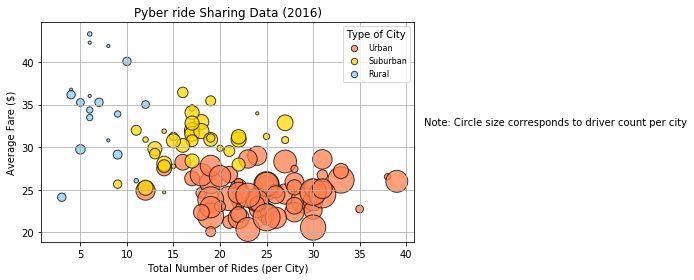

In [9]:
# Obtain the x and y coordinates for each of the three city types
urban_city_data = pyber_data_combined[pyber_data_combined["type"]== "Urban"].groupby([pyber_data_combined["city"]])
suburban_city_data = pyber_data_combined[pyber_data_combined["type"]== "Suburban"].groupby([pyber_data_combined["city"]])
rural_city_data = pyber_data_combined[pyber_data_combined["type"]== "Rural"].groupby([pyber_data_combined["city"]])

# Build the scatter plots for each city types
urban_x = urban_city_data["ride_id"].count()
urban_y = urban_city_data["fare"].mean()
urban_s = urban_city_data["driver_count"].mean()

suburban_x = suburban_city_data["ride_id"].count()
suburban_y = suburban_city_data["fare"].mean()
suburban_s = suburban_city_data["driver_count"].mean()

rural_x = rural_city_data["ride_id"].count()
rural_y = rural_city_data["fare"].mean()
rural_s = rural_city_data["driver_count"].mean()

plt.scatter(urban_x, urban_y, label = "Urban", s=urban_s*10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(suburban_x, suburban_y, label = "Suburban", s=suburban_s * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(rural_x, rural_y, label = "Rural", s=rural_s * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(fontsize=8, title = "Type of City", loc="best")

legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40]
legend.legendHandles[2]._sizes = [40]

# Save Figure
plt.savefig("Pyber_ride_share_analysis_by city_type.png")

#Incorporate a text label regarding circle size
plt.figtext(.99, .55, "Note: Circle size corresponds to driver count per city")

#Display 
plt.tight_layout()
plt.show()



## Total Fares by City Type

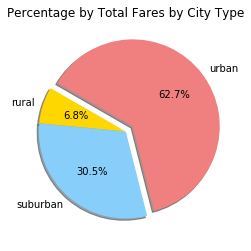

In [10]:
# Calculate Type Percents
fare_percentage = pyber_data_combined.groupby(['type']).sum()['fare']/pyber_data_combined['fare'].sum() * 100
fare_percentage
# Build Pie Chart
plt.pie(fare_percentage, labels =['rural', 'suburban', 'urban'], colors = ['gold', 'lightskyblue', 'lightcoral'], explode=[0, 0, 0.1], 
        autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("Percentage by Total Fares by City Type")
# Save Figure
plt.savefig('pie1.png')
plt.show()

## Total Rides by City Type

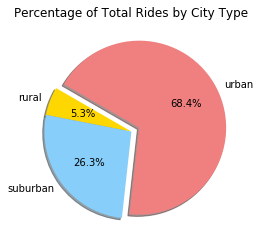

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

In [11]:
# Calculate Ride Percents
ride_percentage = pyber_data_combined.groupby(['type']).count()['ride_id']/pyber_data_combined['ride_id'].count() * 100
ride_percentage
# Build Pie Chart
plt.pie(ride_percentage, labels =['rural', 'suburban', 'urban'], colors = ['gold', 'lightskyblue', 'lightcoral'], explode=[0, 0, 0.1], 
        autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("Percentage of Total Rides by City Type")
# Save Figure
plt.savefig('pie2.png')
plt.show()
ride_percentage

In [12]:
# Show Figure
#plt.show()

## Total Drivers by City Type

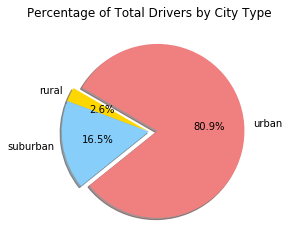

In [13]:
# Calculate Driver Percents
driver_percentage = citydata.groupby(['type']).sum()['driver_count']/citydata['driver_count'].sum() * 100

# Build Pie Chart
plt.pie(driver_percentage, labels =['rural', 'suburban', 'urban'], colors = ['gold', 'lightskyblue', 'lightcoral'], explode=[0, 0, 0.1], 
        autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("Percentage of Total Drivers by City Type")

# Save Figure
plt.savefig('pie3.png')
plt.show()


